# Аналитика ДТП по предоставленным данным

**Описание проекта**


*Вам предлагается поработать над задачей исследования данных о дорожно-транспортных происшествиях (ДТП).*

*Заказчиком (Оунером задачи) выступает проект «Карта ДТП» https://dtp-stat.ru/ — некоммерческий проект, посвященный проблеме дорожно-транспортных происшествий в России. Это платформа сбора данных о ДТП, бесплатный и открытый сервис аналитики ДТП.*

**Цель проекта**

*Провести глубокий анализ данных, сформулировать и проверить гипотезы, опираясь на доступные признаки.*


**Инструкция по выполнению проекта**

**Шаг 1. Открыть файл(файлы) с данными и изучить общую информацию**

**Шаг 2. Подготовить данные**

- 2.1 Отредактировать названия столбцов, обработать пропуски, данные привести к нужному типу.
- 2.2 Проверить таблицу на дубликаты.
- 2.3 Проверить за какой период данными мы распологаем.

**Шаг 3. Провести исследовательский анализ данных**

- 3.1 Падает ли общее количество ДТП в регионе от 2015 к 2024 году, также посмотреть в какой период года увеличивается количество ДТП.
- 3.2 Влияет ли время суток на тяжесть последствий ДТП для людей.
- 3.3 Можно ли сказать, что чем старше авто, тем чаще оно является участником ДТП.
- 3.4 Можно ли сказать, что количество пострадавших или погибших зависит от возраста ТС при ДТП.

**Шаг 4. Проверить гипотезы**
  
- 4.1 Можно ли утверждать, что в Тюмени помесячное количество ДТП  больше, чем во всех остальных районах области.
- 4.2 Можно ли утверждать, что женщины получают травмы (в том числе с летальным исходом) чаще, чем мужчины.
- 4.3 Среднее количество ДТП на мокром или сухом покрытии одинаковы.

**Шаг 5. Написать общий вывод**


**Описание данных**

**df**

 - id - идентификационный номер
 - tags - вид ДТП
 - light - время суток
 - nearby - объекты по близости
 - region - регион
 - datetime - дата и время
 - severity - тяжесть последствий дтп
 - vehicles - транспортные средства и др. информация (две вложенные таблицы)
 - dead_count - количество погибших
 - participants - участники (вложенная таблица)
 - injured_count - количество раненых
 - parent_region - название федерального региона
 - road_conditions - дорожные условия
 - participants_count - количество участников
 - participant_categories - категории участников
 
**vehicles**

 - id - идентификационный номер
 - year - год выпуска авто
 - brand - марка авто
 - color - цвет авто
 - model - модель авто
 - category - категория авто
 - participants - участники (вложенная таблица - participants_vehicles)
 
**participants_vehicles**

 - id -  идентификационный номер
 - role - роль
 - gender - пол
 - violations - нарушение ПДД 
 - health_status - состояние здоровья 
 - years_of_driving_experience - стаж вождения


**participants**

 - id - идентификационный номер
 - role - роль
 - gender - пол 
 - violations - нарушение ПДД 
 - health_status - состояние здоровья 


### Шаг 1.Открыть файл(файлы) с данными и изучить общую информацию

In [1]:
import os
import requests
import json
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from math import sqrt
from scipy import stats as st
from scipy.stats import norm
from datetime import datetime

In [2]:
pth1 = "C:/Users/Home/Desktop/tiumenskaia-oblast.geojson"
url = 'https://cms.dtp-stat.ru/media/opendata/tiumenskaia-oblast.geojson'
response = requests.get(url)
pth2 = response.content.decode('utf-8')

if os.path.exists(pth1):
    with open(pth1, "r", encoding="utf-8") as f:
        data = json.load(f) 
elif (pth2):
    data = json.loads(pth2)
else:
    print('Something is wrong')

In [3]:
print(data.keys())  # Проверить основные ключи
print(data["features"][0]["properties"])

dict_keys(['type', 'features'])
{'id': 2620494, 'tags': ['Дорожно-транспортные происшествия'], 'light': 'В темное время суток, освещение не включено', 'point': {'lat': 57.395526, 'long': 67.073872}, 'nearby': ['Жилые дома индивидуальной застройки', 'Нерегулируемый перекрёсток неравнозначных улиц (дорог)', 'Нерегулируемый пешеходный переход', 'Объект (здание, сооружение) религиозного культа'], 'region': 'Ярковский район', 'scheme': '710', 'address': 'с Ярково, ул Республики, 34', 'weather': ['Ясно'], 'category': 'Наезд на пешехода', 'datetime': '2021-09-16 19:40:00', 'severity': 'С погибшими', 'vehicles': [{'year': 1989, 'brand': 'ВАЗ', 'color': 'Иные цвета', 'model': ' Жигули  ВАЗ-2106 модификации', 'category': 'В-класс (малый) до 3,9 м', 'participants': [{'role': 'Водитель', 'gender': 'Мужской', 'violations': ['Нарушение правил проезда пешеходного перехода', 'Несоблюдение требований ОСАГО'], 'health_status': 'Не пострадал', 'years_of_driving_experience': 9}]}], 'dead_count': 1, 'parti

In [4]:
dtp = pd.json_normalize(data["features"])

In [5]:
print(dtp.head(5))

      type geometry.type    geometry.coordinates  properties.id  \
0  Feature         Point  [67.073872, 57.395526]        2620494   
1  Feature         Point  [67.125435, 57.519603]        2646198   
2  Feature         Point  [67.430649, 57.663769]        2646204   
3  Feature         Point   [66.839232, 57.26352]        2646211   
4  Feature         Point   [66.473808, 57.13256]        2559792   

                       properties.tags  \
0  [Дорожно-транспортные происшествия]   
1  [Дорожно-транспортные происшествия]   
2  [Дорожно-транспортные происшествия]   
3  [Дорожно-транспортные происшествия]   
4  [Дорожно-транспортные происшествия]   

                              properties.light  properties.point.lat  \
0  В темное время суток, освещение не включено             57.395526   
1                          Светлое время суток             57.519603   
2                          Светлое время суток             57.663769   
3                          Светлое время суток          

*После открытия файла мы видим, что работать нужно только с вкладкой "features",файл привели в нужный для работы вид. На основе данного файла создаем Dataframe - `df`, который будет содержать необходимые для нас колонки, дальнейшая работа будет проводится именно с ним.*

### Шаг 2. Подготовить данные

#### 2.1 Отредактировать названия столбцов, обработать пропуски, данные привести к нужному типу

In [6]:
df_raw =(
    pd.DataFrame(data=dtp, columns=['properties.id', 'properties.tags',
    'properties.light', 'properties.nearby', 'properties.region', 'properties.datetime',
    'properties.severity', 'properties.vehicles', 'properties.dead_count', 'properties.participants',
    'properties.injured_count', 'properties.parent_region', 'properties.road_conditions', 
    'properties.participants_count', 'properties.participant_categories'])
)

In [7]:
df_raw = df_raw.rename(
    columns={
        'properties.id': 'id',
        'properties.tags': 'tags',
        'properties.light': 'light',
        'properties.nearby': 'nearby',
        'properties.region': 'region',
        'properties.datetime': 'datetime',
        'properties.severity': 'severity',
        'properties.vehicles': 'vehicles',
        'properties.dead_count': 'dead_count',
        'properties.participants': 'participants',
        'properties.injured_count': 'injured_count',
        'properties.parent_region': 'parent_region',
        'properties.road_conditions': 'road_conditions',
        'properties.participants_count': 'participants_count',
        'properties.participant_categories': 'participant_categories'
        }
)

In [8]:
df_raw.head(5)

,id,tags,light,nearby,region,datetime,severity,vehicles,dead_count,participants,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,2620494,[Дорожно-транспортные происшествия],"В темное время суток, освещение не включено","[Жилые дома индивидуальной застройки, Нерегули...",Ярковский район,2021-09-16 19:40:00,С погибшими,"[{'year': 1989, 'brand': 'ВАЗ', 'color': 'Иные...",1,"[{'role': 'Пешеход', 'gender': 'Женский', 'vio...",0,Тюменская область,"[Иные недостатки, Сухое, Неправильное применен...",2,"[Все участники, Пешеходы]"
1,2646198,[Дорожно-транспортные происшествия],Светлое время суток,[],Ярковский район,2021-11-30 08:15:00,Тяжёлый,"[{'year': 2014, 'brand': 'LIFAN', 'color': 'Бе...",0,[],1,Тюменская область,"[Сухое, Отсутствие, плохая различимость горизо...",3,[Все участники]
2,2646204,[Дорожно-транспортные происшествия],Светлое время суток,[],Ярковский район,2021-11-17 14:25:00,Легкий,"[{'year': 2012, 'brand': 'MAZDA', 'color': 'Ин...",0,[],1,Тюменская область,[Сухое],1,[Все участники]
3,2646211,[Дорожно-транспортные происшествия],Светлое время суток,[],Ярковский район,2021-11-11 13:00:00,С погибшими,"[{'year': 1988, 'brand': 'MERCEDES', 'color': ...",1,[],0,Тюменская область,[Обработанное противогололедными материалами],2,[Все участники]
4,2559792,[Дорожно-транспортные происшествия],Светлое время суток,[Зоны отдыха],Ярковский район,2021-04-11 17:55:00,Легкий,"[{'year': 2020, 'brand': 'Прочие марки ТС', 'c...",0,[],1,Тюменская область,[Сухое],1,[Все участники]


In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26431 entries, 0 to 26430
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      26431 non-null  int64 
 1   tags                    26431 non-null  object
 2   light                   26431 non-null  object
 3   nearby                  26431 non-null  object
 4   region                  26431 non-null  object
 5   datetime                26431 non-null  object
 6   severity                26431 non-null  object
 7   vehicles                26431 non-null  object
 8   dead_count              26431 non-null  int64 
 9   participants            26431 non-null  object
 10  injured_count           26431 non-null  int64 
 11  parent_region           26431 non-null  object
 12  road_conditions         26431 non-null  object
 13  participants_count      26431 non-null  int64 
 14  participant_categories  26431 non-null  object
dtypes:

*После просмотра готового DataFrame мы видим, что имеем 26431 строчку с данными, в которых пропуски есть в столбце `nearby` заменим их на `'Не заполнено'` еще мы видим, что в столбцах имеются лишние скобки, кавычки, данные нужно привести к нужному типу. Так же видим, что в столбцах `vehicles` и `participants` есть свои таблицы, которые необходимо так же открыть и привести в необходимый вид, данные столбцы уберем из таблицы и назовем ее `df`*

In [10]:
df = df_raw.drop(columns=['vehicles', 'participants'])
df.head(5)

,id,tags,light,nearby,region,datetime,severity,dead_count,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,2620494,[Дорожно-транспортные происшествия],"В темное время суток, освещение не включено","[Жилые дома индивидуальной застройки, Нерегули...",Ярковский район,2021-09-16 19:40:00,С погибшими,1,0,Тюменская область,"[Иные недостатки, Сухое, Неправильное применен...",2,"[Все участники, Пешеходы]"
1,2646198,[Дорожно-транспортные происшествия],Светлое время суток,[],Ярковский район,2021-11-30 08:15:00,Тяжёлый,0,1,Тюменская область,"[Сухое, Отсутствие, плохая различимость горизо...",3,[Все участники]
2,2646204,[Дорожно-транспортные происшествия],Светлое время суток,[],Ярковский район,2021-11-17 14:25:00,Легкий,0,1,Тюменская область,[Сухое],1,[Все участники]
3,2646211,[Дорожно-транспортные происшествия],Светлое время суток,[],Ярковский район,2021-11-11 13:00:00,С погибшими,1,0,Тюменская область,[Обработанное противогололедными материалами],2,[Все участники]
4,2559792,[Дорожно-транспортные происшествия],Светлое время суток,[Зоны отдыха],Ярковский район,2021-04-11 17:55:00,Легкий,0,1,Тюменская область,[Сухое],1,[Все участники]


In [11]:
def convert_currency(val):
    new_val = val.replace('[', '').replace(']', '').replace("'", '').replace("''", '')
    return new_val
# Функция для удаления "[]" и "'"

In [12]:
df['tags'] = df['tags'].astype('str').apply(convert_currency)
df['nearby'] = df['nearby'].astype('str').apply(convert_currency)
df['road_conditions'] = df['road_conditions'].astype('str').apply(convert_currency)
df['participant_categories'] = df['participant_categories'].astype('str').apply(convert_currency)
df['datetime'] = pd.to_datetime(df['datetime'])

In [13]:
df['nearby'] = df['nearby'].replace('', 'Не заполнено')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26431 entries, 0 to 26430
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      26431 non-null  int64         
 1   tags                    26431 non-null  object        
 2   light                   26431 non-null  object        
 3   nearby                  26431 non-null  object        
 4   region                  26431 non-null  object        
 5   datetime                26431 non-null  datetime64[ns]
 6   severity                26431 non-null  object        
 7   dead_count              26431 non-null  int64         
 8   injured_count           26431 non-null  int64         
 9   parent_region           26431 non-null  object        
 10  road_conditions         26431 non-null  object        
 11  participants_count      26431 non-null  int64         
 12  participant_categories  26431 non-null  object

In [15]:
df.head(5)

,id,tags,light,nearby,region,datetime,severity,dead_count,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,2620494,Дорожно-транспортные происшествия,"В темное время суток, освещение не включено","Жилые дома индивидуальной застройки, Нерегулир...",Ярковский район,2021-09-16 19:40:00,С погибшими,1,0,Тюменская область,"Иные недостатки, Сухое, Неправильное применени...",2,"Все участники, Пешеходы"
1,2646198,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Ярковский район,2021-11-30 08:15:00,Тяжёлый,0,1,Тюменская область,"Сухое, Отсутствие, плохая различимость горизон...",3,Все участники
2,2646204,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Ярковский район,2021-11-17 14:25:00,Легкий,0,1,Тюменская область,Сухое,1,Все участники
3,2646211,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Ярковский район,2021-11-11 13:00:00,С погибшими,1,0,Тюменская область,Обработанное противогололедными материалами,2,Все участники
4,2559792,Дорожно-транспортные происшествия,Светлое время суток,Зоны отдыха,Ярковский район,2021-04-11 17:55:00,Легкий,0,1,Тюменская область,Сухое,1,Все участники


*В данных убрали скобки и кавычки, привели к нужному типу. Теперь нужно разобраться с двумя столбцами, в которых внутри таблицы*

In [16]:
vehicles_expanded = df_raw[['id','vehicles']].explode('vehicles').dropna().reset_index(drop=True)
vehicles_raw = pd.json_normalize(vehicles_expanded['vehicles']).set_index(vehicles_expanded['id']).reset_index()
vehicles_raw.head()

,id,year,brand,color,model,category,participants
0,2620494,1989.0,ВАЗ,Иные цвета,Жигули ВАЗ-2106 модификации,"В-класс (малый) до 3,9 м","[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
1,2646198,2014.0,LIFAN,Белый,Прочие модели Lifan,"В-класс (малый) до 3,9 м","[{'role': 'Пассажир', 'gender': 'Мужской', 'vi..."
2,2646198,2003.0,УАЗ,Белый,3962,Прочие легковые автомобили,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
3,2646204,2012.0,MAZDA,Иные цвета,Mazda 3,Прочие легковые автомобили,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."
4,2646211,1988.0,MERCEDES,Белый,Прочие модели Mercedes,Фургоны,"[{'role': 'Водитель', 'gender': 'Мужской', 'vi..."


*В данной таблице, мы видим еще столбец с таблицей, так же откроем ее и добавим столбец `id` к ней. Для таблице `vehicles` столбец `participants` нам не нужен, уберем его*

In [17]:
vehicles = vehicles_raw.drop(columns='participants')
vehicles = vehicles.rename(columns={'year': 'year_ts'})
vehicles.head(5)

,id,year_ts,brand,color,model,category
0,2620494,1989.0,ВАЗ,Иные цвета,Жигули ВАЗ-2106 модификации,"В-класс (малый) до 3,9 м"
1,2646198,2014.0,LIFAN,Белый,Прочие модели Lifan,"В-класс (малый) до 3,9 м"
2,2646198,2003.0,УАЗ,Белый,3962,Прочие легковые автомобили
3,2646204,2012.0,MAZDA,Иные цвета,Mazda 3,Прочие легковые автомобили
4,2646211,1988.0,MERCEDES,Белый,Прочие модели Mercedes,Фургоны


In [18]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43780 entries, 0 to 43779
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        43780 non-null  int64  
 1   year_ts   41202 non-null  float64
 2   brand     41319 non-null  object 
 3   color     42157 non-null  object 
 4   model     41319 non-null  object 
 5   category  43780 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.0+ MB


*Видим, что в таблице есть пропуски и не правильно указан тип в столбце с годом, приведем все в необходимый вид.
В столбце `year` - пропуски заменим заглушкой `0`, изменим тип. В столбце `brand` пропуски поменяем на `'Прочие'`, в столбце `color` пропуски поменяем на `'Не заполнено'`, в столбце `model` пропуски поменяем на `'Не заполнено'`*

In [19]:
print(vehicles['year_ts'].isna().sum())
print(vehicles['year_ts'].unique())

2578
[1.989e+03 2.014e+03 2.003e+03 2.012e+03 1.988e+03 2.000e+03 2.020e+03
 2.007e+03 2.013e+03 2.010e+03 2.021e+03 2.017e+03 1.995e+03 2.008e+03
 2.001e+03 2.006e+03 2.018e+03 1.985e+03       nan 2.019e+03 2.015e+03
 2.002e+03 2.016e+03 2.004e+03 1.998e+03 1.980e+03 1.999e+03 2.009e+03
 2.005e+03 1.997e+03 2.011e+03 1.984e+03 1.981e+03 1.983e+03 1.991e+03
 1.993e+03 1.996e+03 1.994e+03 2.022e+03 2.023e+03 1.987e+03 2.024e+03
 1.990e+03 1.992e+03 1.986e+03 1.982e+03 1.976e+03 1.978e+03 1.971e+03
 1.977e+03 1.973e+03 1.979e+03 1.972e+03 1.968e+03 1.974e+03 1.952e+03
 1.975e+03 1.969e+03 1.960e+03 1.966e+03 1.900e+03 1.967e+03 1.910e+03
 1.000e+00]


In [20]:
vehicles['year_ts'] = vehicles['year_ts'].fillna(0).astype('int')

In [21]:
print(vehicles['brand'].isna().sum())
print(vehicles['brand'].unique())

2461
['ВАЗ' 'LIFAN' 'УАЗ' 'MAZDA' 'MERCEDES' 'MITSUBISHI' 'Прочие марки ТС'
 'KIA' 'TOYOTA' 'ISUZU' 'Прочие марки мотоциклов' 'HYUNDAI' 'NISSAN'
 'ACURA' 'ГАЗ' 'HONDA' 'CHEVROLET' None 'VESPA' 'VOLKSWAGEN' 'МАЗ' 'FORD'
 'PORSCHE' 'УРАЛ' 'BAJAJ' 'GEELY' 'MAN' 'DAEWOO' 'BMW' 'OPEL'
 'Прочие марки строительной техники' 'ЗИЛ' 'КРАЗ' 'RENAULT' 'КАМАЗ'
 'SCANIA' 'IVECO' 'ИЖ' 'FOTON' 'МАЗ-МАН' 'SKODA' 'VOLVO' 'SUZUKI'
 'FREIGHTLINER' 'DAF' 'HOWO' 'FIAT' 'CHERY' 'HAVAL' 'ПАЗ' 'SSANGYONG'
 'ЗАЗ' 'Прочие марки грузовых ТС' 'KAWASAKI' 'RAVON' 'SUBARU' 'DODGE'
 'LEXUS' 'JAC' 'GREAT WALL' 'FAW' 'HIGER' 'PEUGEOT' 'OMODA' 'CITROEN'
 'YAMAHA' 'Datsun' 'AUDI' 'НефАЗ' 'КАВЗ' 'KENWORTH' 'ТАГАЗ (TAGAZ)' 'OSSA'
 'BRILLIANCE' 'ВОСХОД' 'BYD' 'MINSK' 'МОСКВИЧ' 'HUABEI'
 'Прочие марки легких коммерческих ТС' 'HAIMA' 'Прочие марки легковых ТС'
 'LAND ROVER' 'SETRA' 'KING LONG' 'SHAANXI' 'HOLDEN' 'PETERBILT' 'CHANGAN'
 'HONLING' 'Прочие марки автобусов' 'MOTO GUZZI' 'BM' 'INFINITI' 'NEOPLAN'
 'HARLEY-DAVIDSON' '

In [22]:
vehicles['brand'] = vehicles['brand'].fillna('Прочие')

In [23]:
print(vehicles['color'].isna().sum())
print(vehicles['color'].unique())

1623
['Иные цвета' 'Белый' 'Серый' 'Черный' 'Синий' 'Красный' 'Зеленый' None
 'Коричневый' 'Оранжевый' 'Фиолетовый' 'Не заполнено' 'Многоцветный'
 'Желтый']


In [24]:
vehicles['color'] = vehicles['color'].fillna('Не заполнено')

In [25]:
print(vehicles['model'].isna().sum())
print(vehicles['model'].unique())

2461
[' Жигули  ВАЗ-2106 модификации' 'Прочие модели Lifan' '3962' ... '6323'
 '23' 'Sailor']


In [26]:
vehicles['model'] = vehicles['model'].fillna('Не заполнено')

In [27]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43780 entries, 0 to 43779
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        43780 non-null  int64 
 1   year_ts   43780 non-null  int32 
 2   brand     43780 non-null  object
 3   color     43780 non-null  object
 4   model     43780 non-null  object
 5   category  43780 non-null  object
dtypes: int32(1), int64(1), object(4)
memory usage: 1.8+ MB


*Пропусков в таблице нет, нужный тип данных. Тоже самое проделаем с таблицей `participants_vehicles`*

In [28]:
participants_vehicles_expanded = vehicles_raw[['id','participants']].explode('participants').dropna().reset_index(drop=True)
participants_vehicles = pd.json_normalize(participants_vehicles_expanded['participants']).set_index(participants_vehicles_expanded['id']).reset_index()
participants_vehicles

,id,role,gender,violations,health_status,years_of_driving_experience
0,2620494,Водитель,Мужской,[Нарушение правил проезда пешеходного перехода...,Не пострадал,9.0
1,2646198,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на стацион...",NaN
2,2646198,Водитель,Мужской,[],Не пострадал,2.0
3,2646198,Водитель,Мужской,"[Разворот в местах, где разворот запрещён, Упр...",Не пострадал,5.0
4,2646204,Водитель,Мужской,[Превышение установленной скорости движения],"Раненый, находящийся (находившийся) на амбулат...",16.0
...,...,...,...,...,...,...
59401,1797610,Пассажир,Женский,[],"Раненый, находящийся (находившийся) на амбула...",NaN
59402,1797610,Водитель,Мужской,[Неправильный выбор дистанции],Не пострадал,9.0
59403,1797610,Пассажир,Женский,[],"Раненый, находящийся (находившийся) на амбула...",NaN
59404,1797610,Водитель,Мужской,[],Не пострадал,40.0


In [29]:
participants_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59406 entries, 0 to 59405
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           59406 non-null  int64  
 1   role                         59406 non-null  object 
 2   gender                       57506 non-null  object 
 3   violations                   59406 non-null  object 
 4   health_status                59182 non-null  object 
 5   years_of_driving_experience  37064 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.7+ MB


*Видим, что в таблице есть пропуски и не правильно указан тип в столбце со стажем, приведем все к необходимому виду. В столбце `gender` пропуски поменяем на `'Не заполнено'`, в столбце `violations` изменим тип, уберем скобки, а пропуски поменяем на `'Не заполнено'`, в столбце `health_status` пропуски поменяем на `'Не заполнено'`, а в столбце `years_of_driving_experience` - пропуски заменим заглушкой `0`, изменим тип.*

In [30]:
print(participants_vehicles['gender'].isna().sum())
print(participants_vehicles['gender'].unique())

1900
['Мужской' 'Женский' None]


In [31]:
participants_vehicles['gender'] = participants_vehicles['gender'].fillna('Не заполнено')

In [32]:
participants_vehicles['violations'] = participants_vehicles['violations'].astype('str').apply(convert_currency)

In [33]:
print(participants_vehicles['violations'].unique())
print(participants_vehicles['violations'].isna().sum())

['Нарушение правил проезда пешеходного перехода, Несоблюдение требований ОСАГО'
 ''
 'Разворот в местах, где разворот запрещён, Управление ТС в состоянии алкогольного опьянения, Отсутствие у водителя документов, предусмотренных законодательными и иными НПА'
 ...
 'Несоблюдение очередности проезда, Управление ТС в состоянии алкогольного опьянения, Светопропускание стекол менее нормативного, Несоблюдение требований ОСАГО'
 'Несоответствие скорости конкретным условиям движения, Эксплуатация технически неисправного ТС (проставляется в случае ДТП по причине технеисправности), Управление ТС в состоянии алкогольного опьянения, Управление ТС лицом, не имеющим права на управление ТС, Несоблюдение требований ОСАГО'
 'Несоблюдение очередности проезда перекрестков, Управление ТС лицом, лишенным права управления, Несоблюдение требований ОСАГО, Отказ водителя от прохождения медицинского освидетельствования на состояние опьянения']
0


In [34]:
participants_vehicles['violations'] = participants_vehicles['violations'].replace('', 'Не заполнено')

In [35]:
print(participants_vehicles['health_status'].isna().sum())
print(participants_vehicles['health_status'].unique())

224
['Не пострадал'
 'Раненый, находящийся (находившийся) на стационарном лечении'
 'Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара'
 'Скончался на месте ДТП до приезда скорой медицинской помощи'
 'Получил телесные повреждения с показанием к лечению в медицинских организациях, фактически лечение не проходил, к категории раненый не относится'
 'Получил телесные повреждения с показанием к лечению в медицинских организациях (кроме разовой медицинской помощи)'
 'Скончался в течение 7 суток'
 'Получил травмы с оказанием разовой медицинской помощи, к категории раненый не относится'
 'Скончался в течение 16 суток'
 'Раненый, находящийся (находившийся)  на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)'
 None 'Скончался в течение 1 суток' 'Скончался в течение 4 суток'
 'Скончался при транспортировке' 'Скончался в течение 6 суток'


In [36]:
participants_vehicles['health_status'] = participants_vehicles['health_status'].fillna('Не заполнено')

In [37]:
print(participants_vehicles['years_of_driving_experience'].isna().sum())
print(participants_vehicles['years_of_driving_experience'].unique())

22342
[ 9. nan  2.  5. 16. 20. 21.  6. 22. 37. 15.  4. 14.  3. 13. 39. 35. 11.
 46. 29. 36.  7. 24. 27.  1. 12. 31. 17. 32. 10. 26. 63. 41. 19. 45. 18.
  8. 25. 30. 23. 33. 34. 47. 28. 44. 38. 42. 40. 43. 52. 49. 54. 51. 48.
 50. 55. 56. 53. 62. 60. 58. 57. 61. 65. 59. 64.]


In [38]:
participants_vehicles['years_of_driving_experience'] = participants_vehicles['years_of_driving_experience'].fillna(0).astype('int')

In [39]:
participants_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59406 entries, 0 to 59405
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           59406 non-null  int64 
 1   role                         59406 non-null  object
 2   gender                       59406 non-null  object
 3   violations                   59406 non-null  object
 4   health_status                59406 non-null  object
 5   years_of_driving_experience  59406 non-null  int32 
dtypes: int32(1), int64(1), object(4)
memory usage: 2.5+ MB


*В таблице `participants` так же проверим все данные и приведем ее к нужному виду. Заменить пропуски на `Не заполнено` и убрать лишние скобки и кавычки*

In [40]:
participants_expanded = df_raw[['id','participants']].explode('participants').dropna().reset_index(drop=True)
participants = pd.json_normalize(participants_expanded['participants']).set_index(participants_expanded['id']).reset_index()
participants

,id,role,gender,violations,health_status
0,2620494,Пешеход,Женский,[],Скончался в течение 9 суток
1,2763772,Пешеход,Мужской,[Переход через проезжую часть в неустановленно...,Скончался на месте ДТП до приезда скорой медиц...
2,2776720,Пешеход,Мужской,[],"Раненый, находящийся (находившийся) на стацион..."
3,2679049,Пешеход,Мужской,[],"Раненый, находящийся (находившийся) на стацион..."
4,2679432,Пешеход,Мужской,[Переход через проезжую часть вне пешеходного ...,"Раненый, находящийся (находившийся) на амбулат..."
...,...,...,...,...,...
6201,1801368,Пешеход,Мужской,[],"Раненый, находящийся (находившийся) на амбула..."
6202,1801368,Пешеход,Мужской,[],"Раненый, находящийся (находившийся) на амбула..."
6203,1790427,Пешеход,Мужской,[Неожиданный выход из-за стоящего ТС],"Раненый, находящийся (находившийся) на амбула..."
6204,1795289,Пешеход,Мужской,[Неожиданный выход из-за ТС],"Раненый, находящийся (находившийся) на амбулат..."


In [41]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6206 entries, 0 to 6205
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             6206 non-null   int64 
 1   role           6206 non-null   object
 2   gender         6112 non-null   object
 3   violations     6206 non-null   object
 4   health_status  6206 non-null   object
dtypes: int64(1), object(4)
memory usage: 242.5+ KB


In [42]:
participants['violations'] = participants['violations'].astype('str').apply(convert_currency)

In [43]:
print(participants['gender'].isna().sum())
print(participants['gender'].unique())

94
['Женский' 'Мужской' None]


In [44]:
participants['gender'] = participants['gender'].fillna('Не заполнено')

In [45]:
print(participants['violations'].isna().sum())
print(participants['violations'].unique())

0
[''
 'Переход через проезжую часть в неустановленном месте (при наличии в зоне видимости перекрёстка)'
 'Переход через проезжую часть вне пешеходного перехода в зоне его видимости либо при наличии в непосредственной близости подземного (надземного) пешеходного перехода'
 'Отсутствие световозвращающих элементов'
 'Ходьба вдоль проезжей части попутного направления вне населенного пункта при удовлетворительном состоянии обочины'
 'Нахождение на проезжей части без цели её перехода'
 'Нахождение на проезжей части без цели её перехода, Пешеход в состоянии алкогольного опьянения, Отсутствие световозвращающих элементов'
 'Движение вдоль проезжей части попутного направления вне населенного пункта при удовлетворительном состоянии обочины'
 'Нахождение на проезжей части без цели её перехода, Отсутствие световозвращающих элементов'
 'Игра на проезжей части' 'Иные нарушения'
 'Пешеход в состоянии алкогольного опьянения, Переход через проезжую часть в неустановленном месте (при наличии в зоне види

In [46]:
participants['violations'] = participants['violations'].replace('', 'Не заполнено')

In [47]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6206 entries, 0 to 6205
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             6206 non-null   int64 
 1   role           6206 non-null   object
 2   gender         6206 non-null   object
 3   violations     6206 non-null   object
 4   health_status  6206 non-null   object
dtypes: int64(1), object(4)
memory usage: 242.5+ KB


#### 2.2 Проверить таблицы на дубликаты  

In [48]:
df.duplicated().sum()

0

In [49]:
df[df.duplicated(['tags', 'light', 'nearby', 'region', 'datetime', 'severity', 'injured_count', 'dead_count', 'road_conditions', 'participants_count', 'participant_categories'])]

,id,tags,light,nearby,region,datetime,severity,dead_count,injured_count,parent_region,road_conditions,participants_count,participant_categories
11644,1787186,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Тюмень,2017-06-15 00:01:00,Легкий,0,1,Тюменская область,Сухое,2,Все участники
18858,1787209,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Тюмень,2017-06-15 00:01:00,Легкий,0,1,Тюменская область,Сухое,2,Все участники
20505,1787205,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Тюмень,2017-06-15 00:01:00,Легкий,0,1,Тюменская область,Сухое,2,Все участники
21916,1787192,Дорожно-транспортные происшествия,Светлое время суток,"Административные здания, АЗС, Остановка общест...",Тюмень,2017-06-15 00:01:00,Легкий,0,1,Тюменская область,Сухое,2,Все участники
22203,1787120,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Тюмень,2017-06-27 00:01:00,Легкий,0,1,Тюменская область,Сухое,1,Все участники
23587,1795191,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Тюмень,2017-11-11 11:00:00,Легкий,0,1,Тюменская область,Сухое,2,Все участники


In [50]:
df.drop_duplicates(subset=['tags', 'light', 'nearby', 'region', 'datetime', 'severity', 'injured_count', 'dead_count', 'road_conditions', 'participants_count', 'participant_categories'], keep=False, inplace=True)

*Явных дубликатов не обнаружено, не явные выявлены и удалены*

In [51]:
vehicles.duplicated().sum()

52

In [52]:
vehicles = vehicles.drop_duplicates().reset_index(drop=True)

*Явные дубликаты удалены, не явные дубликаты выявлять не будем, так как одинаковых авто с годом, цветом, классом очень много на дорогах регионов*

In [53]:
participants_vehicles.duplicated().sum()

2545

In [54]:
participants_vehicles = participants_vehicles.drop_duplicates().reset_index(drop=True)

*Явные дубликаты удалены, не явные дубликаты выявлять не будем, так как совпадений в данной таблице может быть много*

In [55]:
participants.duplicated().sum()

131

In [56]:
participants = participants.drop_duplicates().reset_index(drop=True)

*Явные дубликаты удалены, не явные дубликаты выявлять не будем, так как совпадений в данной таблице может быть много*

#### 2.3 Проверить за какой период данными мы распологаем

In [57]:
min = df['datetime'].min()
print('Начало периода исследования:', min)

Начало периода исследования: 2015-01-01 01:30:00


In [58]:
max = df['datetime'].max()
print('Конец периода исследования:', max)

Конец периода исследования: 2024-09-30 20:00:00


**Мы распологаем данными практически за 10 лет, начиная с января 2015 года по сентябрь 2024 года включительно. В таблицах содержится много данных по ДТП с разной тяжестью последствий как для ТС, так и для людей. Данные приведены в надлежащий вид, пропуски заменены на заглушки для удобства работы с данными.**

### Шаг 3. Провести исследовательский анализ данных

#### 3.1 Падает ли общее количество ДТП в регионе от 2015 к 2024 году, также посмотреть в какой период года увеличивается количество ДТП

*Добавим в имеющуюся таблицу `df` столбец `year` и `month`, в котором укажем год и месяц ДТП, а так же столбец `month_year` месяц и год, для построения таблицы*

In [59]:
df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['month_year'] = df['datetime'].dt.to_period('M')

In [60]:
df.head(3) # Проверяем, что столбцы добавились

,id,tags,light,nearby,region,datetime,severity,dead_count,injured_count,parent_region,road_conditions,participants_count,participant_categories,year,month,month_year
0,2620494,Дорожно-транспортные происшествия,"В темное время суток, освещение не включено","Жилые дома индивидуальной застройки, Нерегулир...",Ярковский район,2021-09-16 19:40:00,С погибшими,1,0,Тюменская область,"Иные недостатки, Сухое, Неправильное применени...",2,"Все участники, Пешеходы",2021,9,2021-09
1,2646198,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Ярковский район,2021-11-30 08:15:00,Тяжёлый,0,1,Тюменская область,"Сухое, Отсутствие, плохая различимость горизон...",3,Все участники,2021,11,2021-11
2,2646204,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Ярковский район,2021-11-17 14:25:00,Легкий,0,1,Тюменская область,Сухое,1,Все участники,2021,11,2021-11


In [61]:
(
    df.pivot_table(index='year', values='id', aggfunc='count')
    .sort_values(by='year')
    .style.background_gradient('coolwarm')
)

,id
year,
2015,2620
2016,2509
2017,2771
2018,2879
2019,2880
2020,2407
2021,2565
2022,2493
2023,3009


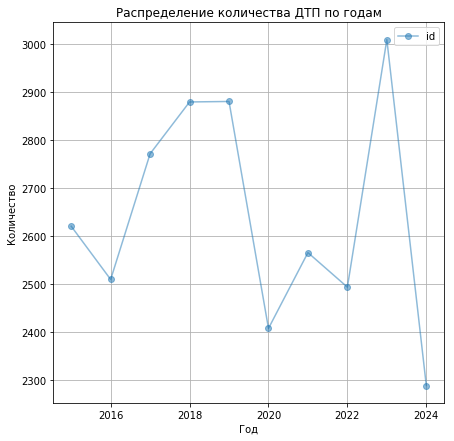

In [62]:
(
    df.pivot_table(index='year', values='id', aggfunc='count')
    .sort_values(by='year')
    .plot(style='o-',alpha=0.5, figsize=(7, 7), grid=True)
)
plt.legend()
plt.xlabel('Год')
plt.ylabel('Количество')
plt.title('Распределение количества ДТП по годам')
plt.show()

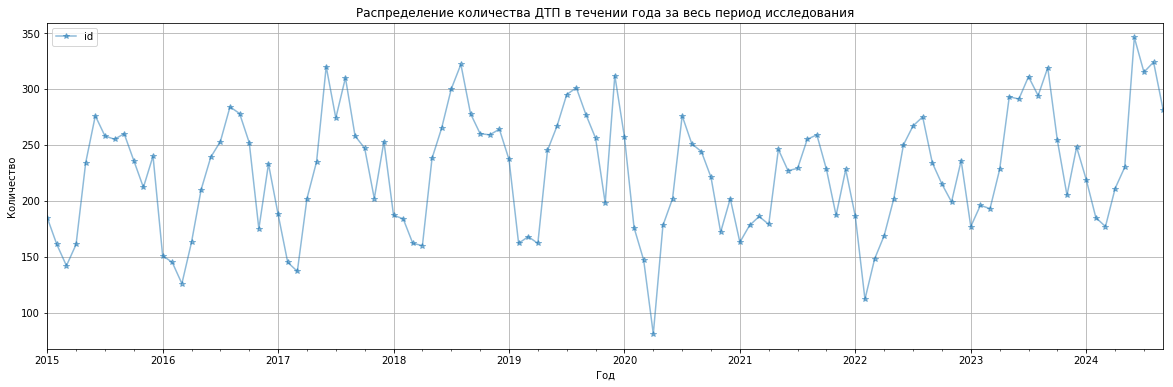

In [63]:
(
    df.pivot_table(index='month_year', values='id', aggfunc='count')
    .sort_values(by='month_year')
    .plot(style='*-',alpha=0.5, figsize=(20, 6), grid=True)
)
plt.legend()
plt.xlabel('Год')
plt.ylabel('Количество')
plt.title('Распределение количества ДТП в течении года за весь период исследования')
plt.show()

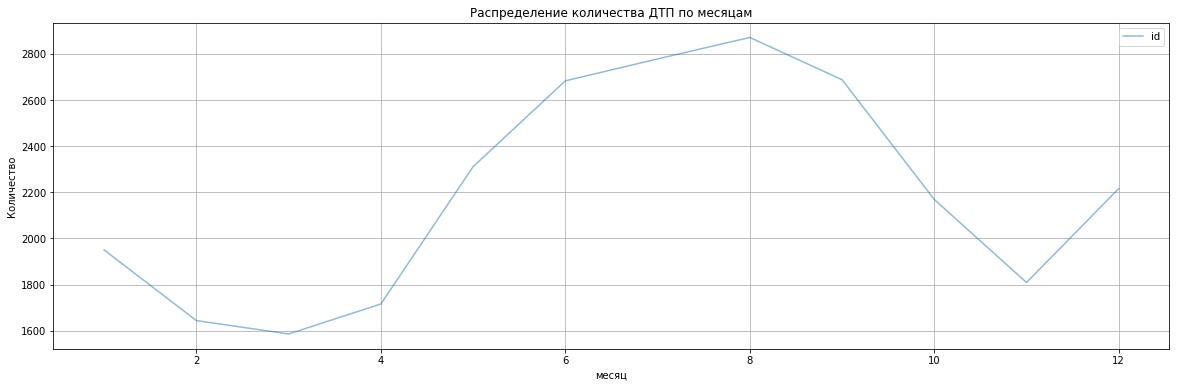

In [64]:
(
    df.pivot_table(index='month', values='id', aggfunc='count')
    .sort_values(by='month')
    .plot(style='-',alpha=0.5, figsize=(20, 6), grid=True)
)
plt.legend()
plt.xlabel('месяц')
plt.ylabel('Количество')
plt.title('Распределение количества ДТП по месяцам')
plt.show()

*После построения сводной таблицы и графиков можно сказать, что за период 2015-2024 г. в Тюменской области количество ДТП не снижается, мы видим падение количества в период локдауна, но большой рост в 2023 году, про 2024 год мы не можем сказать, но его показатели на графике по месяцам тоже показывают рост ДТП. Также после построения графиков за весь период года и отдельно по месяцам можно сделать вывод, что большее количество ДПТ приходится на период с апреля по октябрь с пиком в августе, связано это может быть, что в этот период люди ездят в отпуск, на дачу и вообще активно пользуются транспортом.*

#### 3.2 Влияет ли время суток на тяжесть последствий ДТП для людей.

*Для решения данной задачи напишем функцию, которая позволит в столбце `'light'` собрать все данные про `Темное время суток` в один показатель*

In [65]:
def type_light(row):
    light = row['light']
    if light != 'Светлое время суток':
        return 'Темное время суток'
    return 'Светлое время суток'

In [66]:
df_light = df[(df['light'] != 'Не установлено')]
df_light['light_type'] = df_light.apply(type_light, axis=1)
df_light.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,tags,light,nearby,region,datetime,severity,dead_count,injured_count,parent_region,road_conditions,participants_count,participant_categories,year,month,month_year,light_type
0,2620494,Дорожно-транспортные происшествия,"В темное время суток, освещение не включено","Жилые дома индивидуальной застройки, Нерегулир...",Ярковский район,2021-09-16 19:40:00,С погибшими,1,0,Тюменская область,"Иные недостатки, Сухое, Неправильное применени...",2,"Все участники, Пешеходы",2021,9,2021-09,Темное время суток
1,2646198,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Ярковский район,2021-11-30 08:15:00,Тяжёлый,0,1,Тюменская область,"Сухое, Отсутствие, плохая различимость горизон...",3,Все участники,2021,11,2021-11,Светлое время суток
2,2646204,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Ярковский район,2021-11-17 14:25:00,Легкий,0,1,Тюменская область,Сухое,1,Все участники,2021,11,2021-11,Светлое время суток


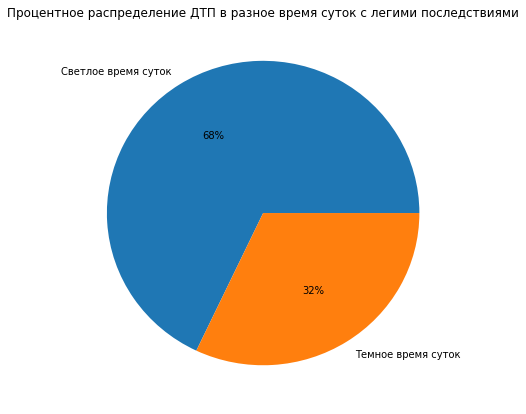

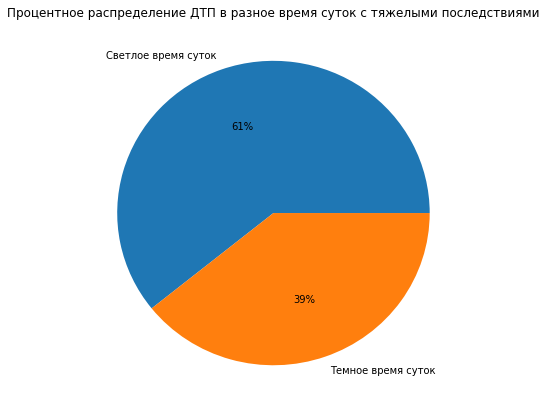

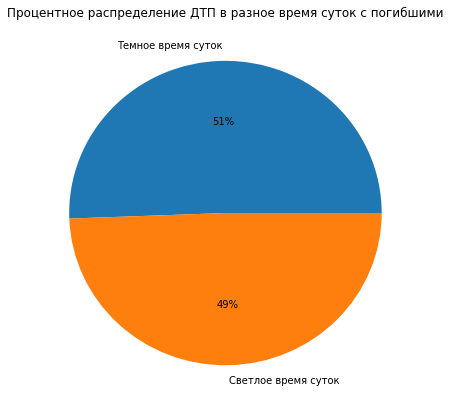

In [67]:
(
   df_light[(df_light['severity'] == 'Легкий')].pivot_table(index='light_type', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(7, 7), legend=False)
)
plt.ylabel('')
plt.title('Процентное распределение ДТП в разное время суток с легими последствиями')
(
    df_light[(df_light['severity'] == 'Тяжёлый')].pivot_table(index='light_type', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(7, 7), legend=False)
)
plt.ylabel('')
plt.title('Процентное распределение ДТП в разное время суток с тяжелыми последствиями')
(
    df_light[(df_light['severity'] == 'С погибшими')].pivot_table(index='light_type', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(7, 7), legend=False)
)
plt.ylabel('')
plt.title('Процентное распределение ДТП в разное время суток с погибшими')
plt.show()

*После построения графиков можно увидеть, что от 60 до 70 процентов дтп в светлое время суток с легкими и тяжелыми последствиями, а с погибшими график меняется и показывает, что больше 50 процентов дтп с летальным исходом в темное время суток и практически 50 процентов в светлое.*

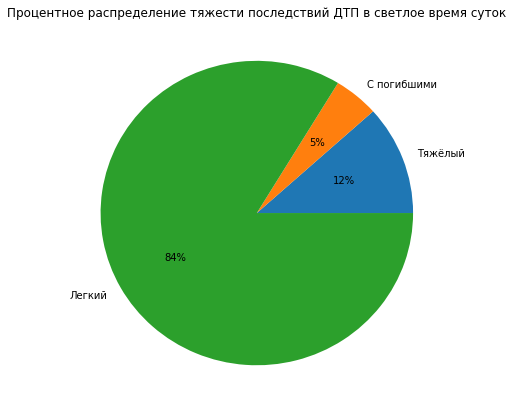

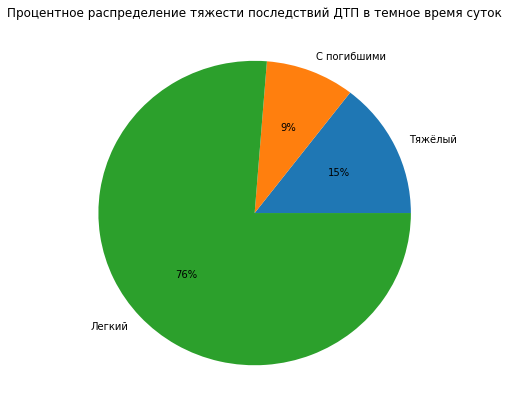

In [68]:
(
    df_light[(df_light['light_type'] == 'Светлое время суток')].pivot_table(index='severity', values='id', aggfunc='count')
    .sort_values(by='severity', ascending=False)
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(7, 7), legend=False)
)
plt.ylabel('')
plt.title('Процентное распределение тяжести последствий ДТП в светлое время суток')
(
    df_light[(df_light['light_type'] == 'Темное время суток')].pivot_table(index='severity', values='id', aggfunc='count')
    .sort_values(by='severity', ascending=False)
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(7, 7), legend=False)
)
plt.ylabel('')
plt.title('Процентное распределение тяжести последствий ДТП в темное время суток')
plt.show()

*После построения дополнительных графиков можно увидеть, что в темное время суток тяжесть последствий ДТП выше, чем в светлое время. С летальным исходом 9% в темное время, 5% в светлое, с тяжелыми последствиями 15% и 12% соответственно.*

#### 3.3 Можно ли сказать, что чем старше авто, тем чаще оно является участником ДТП.

*Для решения данной задачи соеденим таблицы `df` и `vehicles` по `id`, потом добавим в нее столбец с возрастом авто: `avto_year`, а дальше напишем функцию, которая проставит значение в новый столбец с показателями: `до 5 лет`, `от 5 до 10 лет`, `от 10 до 20 лет` и `старше 20 лет`*

In [69]:
df_avto = df.merge(vehicles, on='id', how='inner')
df_avto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43715 entries, 0 to 43714
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      43715 non-null  int64         
 1   tags                    43715 non-null  object        
 2   light                   43715 non-null  object        
 3   nearby                  43715 non-null  object        
 4   region                  43715 non-null  object        
 5   datetime                43715 non-null  datetime64[ns]
 6   severity                43715 non-null  object        
 7   dead_count              43715 non-null  int64         
 8   injured_count           43715 non-null  int64         
 9   parent_region           43715 non-null  object        
 10  road_conditions         43715 non-null  object        
 11  participants_count      43715 non-null  int64         
 12  participant_categories  43715 non-null  object

In [70]:
df_avto['avto_year'] = df_avto['year'] - df_avto['year_ts']
df_avto = df_avto[(df_avto['avto_year'] < 100)]

In [71]:
def categorize_avto(year):
    try:
        if 0 < year <= 5:
            return 'до 5 лет'
        elif 5 < year <= 10:
            return 'от 5 до 10 лет'
        elif 10 < year <= 20:
            return 'от 10 до 20'
        elif 20 < year:
            return 'старше 20 лет'
        return 'Нет данных'  
    except:
        pass

In [72]:
df_avto['categorize_avto'] = df_avto['avto_year'].apply(categorize_avto)
df_avto.head(3)

,id,tags,light,nearby,region,datetime,severity,dead_count,injured_count,parent_region,...,year,month,month_year,year_ts,brand,color,model,category,avto_year,categorize_avto
0,2620494,Дорожно-транспортные происшествия,"В темное время суток, освещение не включено","Жилые дома индивидуальной застройки, Нерегулир...",Ярковский район,2021-09-16 19:40:00,С погибшими,1,0,Тюменская область,...,2021,9,2021-09,1989,ВАЗ,Иные цвета,Жигули ВАЗ-2106 модификации,"В-класс (малый) до 3,9 м",32,старше 20 лет
1,2646198,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Ярковский район,2021-11-30 08:15:00,Тяжёлый,0,1,Тюменская область,...,2021,11,2021-11,2014,LIFAN,Белый,Прочие модели Lifan,"В-класс (малый) до 3,9 м",7,от 5 до 10 лет
2,2646198,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Ярковский район,2021-11-30 08:15:00,Тяжёлый,0,1,Тюменская область,...,2021,11,2021-11,2003,УАЗ,Белый,3962,Прочие легковые автомобили,18,от 10 до 20


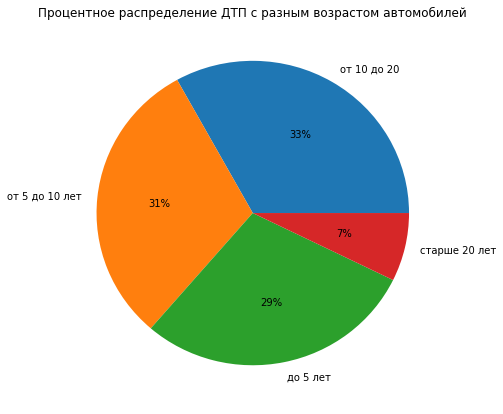

In [73]:
(
    df_avto[(df_avto['categorize_avto'] != 'Нет данных')]
    .pivot_table(index='categorize_avto', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(7, 7), legend=False)
)
plt.ylabel('')
plt.title('Процентное распределение ДТП с разным возрастом автомобилей')
plt.show()

*На полученом графике мы видим, что доля автомобилей старше 20 лет самая маленькая из всех 7%, но и надо предпологать, что автомобилей на дороге с таким возрастом меньше. Остальные доли распределились 29% - возраст авто до 5 лет, 31% - возраст авто от 5 до 10 лет, 33% - возраст авто от 10 до 20 лет. Можно сказать, что есть некая зависимость возраста автомобиля и процента участия его в ДТП*

#### 3.4 Можно ли сказать, что количество пострадавших или погибших зависит от возраста ТС при ДТП.

*Построим корреляционную матрицу для таблицы `df_avto` на ней мы сможем увидеть коэффицент корреляции между  возрастом автомобилей и количеством пострадавших и погибших*

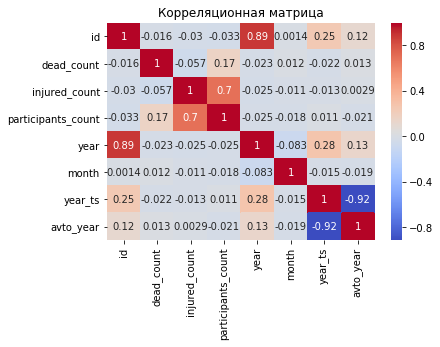

In [74]:
sns.heatmap(df_avto.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [75]:
print( 'Коэффициент корреляции между возрастом авто и погибшими:', df_avto['avto_year'].corr(df_avto['dead_count']))

Коэффициент корреляции между возрастом авто и погибшими: 0.012576397450480432


In [76]:
print( 'Коэффициент корреляции между возрастом авто и пострадавшими:', df_avto['avto_year'].corr(df_avto['injured_count']))

Коэффициент корреляции между возрастом авто и пострадавшими: 0.0029373677989749446


*Мы видим, что зависимости возраста автомобиля и количества жертв и пострадавших не выявлено*

**Исследовательский анализ показал, что количество ДТП на дорогах Тюменской области не снижается, а наоборот в 2023 году показали рост, так как у нас нет данных за полный 2024 год, сказать, что это тенденция к росту мы не можем. Так же мы увидели, что летние периоды самые аварийные, в зимний период таких показателей нет. Также можно сказать, что в темное время суток происходит больше ДТП с тяжелыми или летальными последствиями. Мы выяснили, что возраст автомобиля не влияет на тяжесть последствий ДТП, но есть некая зависимость возраста автомобиля и процент его участия в ДТП.**

### Шаг 4. Проверить гипотезы

#### 4.1 Можно ли утверждать, что в Тюмени помесячное количество ДТП  больше, чем во всех остальных районах области.

*Чтобы приступить к проверке гипотезы напишем функцию, которой поделим все данные из таблицы на `Тюмень`или `Районы области`далее добавим столбец с этими значениями и сделаем сводную таблицу, в котрой будут данные по этим двум районам и количество ДТП в каждый месяц.*

In [77]:
def type_region(row):
    region = row['region']
    if region != 'Тюмень':
        return 'Районы области'
    return 'Тюмень'

In [78]:
df_region = df
df_region['region_type'] = df_region.apply(type_region, axis=1)
df_region.head(3)

,id,tags,light,nearby,region,datetime,severity,dead_count,injured_count,parent_region,road_conditions,participants_count,participant_categories,year,month,month_year,region_type
0,2620494,Дорожно-транспортные происшествия,"В темное время суток, освещение не включено","Жилые дома индивидуальной застройки, Нерегулир...",Ярковский район,2021-09-16 19:40:00,С погибшими,1,0,Тюменская область,"Иные недостатки, Сухое, Неправильное применени...",2,"Все участники, Пешеходы",2021,9,2021-09,Районы области
1,2646198,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Ярковский район,2021-11-30 08:15:00,Тяжёлый,0,1,Тюменская область,"Сухое, Отсутствие, плохая различимость горизон...",3,Все участники,2021,11,2021-11,Районы области
2,2646204,Дорожно-транспортные происшествия,Светлое время суток,Не заполнено,Ярковский район,2021-11-17 14:25:00,Легкий,0,1,Тюменская область,Сухое,1,Все участники,2021,11,2021-11,Районы области


In [79]:
tym_region = df_region.pivot_table(index='region_type', columns='month_year', values='id', aggfunc='count')

*Нулевая гипотеза: Среднее количество ДТП в Тюмени и остальных районах равны. Альтернативная гипотеза: Среднее количество ДТП в Тюмени больше, чем в остальных районах области.*

*Чтобы проверить данную гипотезу, нужно передать в метод `ttest_ind()` сначала выборку (tym_region.loc['Тюмень']), затем выборку (tym_region.loc['Районы области']). В качестве `alternative` укажем 'greater', то есть "больше". Уровень статистической значимости выберем 0,05.*

In [80]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(tym_region.loc['Тюмень'], tym_region.loc['Районы области'], alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 7.097269624346794e-24
Отвергаем нулевую гипотезу


**Полученное значение p-value меньше заданного уровня значимости, поэтому нулевую гипотезу мы отвергаем. Есть основания говорить, что в Тюмени помесячное количество ДТП больше, чем в остальных районах.**

#### 4.2 Можно ли утверждать, что женщины получают травмы (в том числе с летальным исходом) чаще, чем мужчины.

*Так как мы имеем две таблицы с участниками ДТП, в которых указаны пострадавшие, проведем два теста. Чтобы приступить к проверке гипотезы возьмем две таблицы `df` и `participants` и соединим их по `id`, так же поступим с `df` и `participants_vehicles`. Дальше составим сводную таблицу, в котрой посчитаем количество пострадавших мужчин и женщин в каждый месяц нашего исследования.*

In [81]:
df_participants = df.merge(participants, on='id', how='inner')
df_participants = df_participants[(df_participants['health_status'] != 'Не пострадал')]
df_participants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6052 entries, 0 to 6074
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      6052 non-null   int64         
 1   tags                    6052 non-null   object        
 2   light                   6052 non-null   object        
 3   nearby                  6052 non-null   object        
 4   region                  6052 non-null   object        
 5   datetime                6052 non-null   datetime64[ns]
 6   severity                6052 non-null   object        
 7   dead_count              6052 non-null   int64         
 8   injured_count           6052 non-null   int64         
 9   parent_region           6052 non-null   object        
 10  road_conditions         6052 non-null   object        
 11  participants_count      6052 non-null   int64         
 12  participant_categories  6052 non-null   object  

In [82]:
df_gender = df_participants.pivot_table(index='gender', columns='month_year', values='id', aggfunc='count')

*Нулевая гипотеза: Среднее количество пострадавших в ДТП мужчин и женщин равны. Альтернативная гипотеза: Среднее количество пострадавших в ДТП женщин больше чем мужчин.*

*Чтобы проверить данную гипотезу, нужно передать в метод `ttest_ind()` сначала выборку (df_gender.loc['Женский']), затем выборку (df_gender.loc['Мужской']). В качестве `alternative` укажем 'greater', то есть "больше". Уровень статистической значимости выберем 0,05.*

In [83]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(df_gender.loc['Женский'], df_gender.loc['Мужской'], alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 0.9845080300744078
Не получилось отвергнуть нулевую гипотезу


**Полученное значение p-value больше заданного уровня значимости, поэтому нулевая гипотеза не отвергается.**

In [84]:
df_pv = df.merge(participants_vehicles, on='id', how='inner')
df_pv = df_pv[(df_pv['health_status'] != 'Не пострадал')& (df_pv['health_status'] != 'Не заполнено')]
df_pv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29266 entries, 1 to 56840
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           29266 non-null  int64         
 1   tags                         29266 non-null  object        
 2   light                        29266 non-null  object        
 3   nearby                       29266 non-null  object        
 4   region                       29266 non-null  object        
 5   datetime                     29266 non-null  datetime64[ns]
 6   severity                     29266 non-null  object        
 7   dead_count                   29266 non-null  int64         
 8   injured_count                29266 non-null  int64         
 9   parent_region                29266 non-null  object        
 10  road_conditions              29266 non-null  object        
 11  participants_count           29266 non-nu

In [85]:
df_pv_gender = df_pv.pivot_table(index='gender', columns='month_year', values='id', aggfunc='count')

*Чтобы проверить данную гипотезу, нужно передать в метод `ttest_ind()` сначала выборку (df_pv_gender.loc['Женский']), затем выборку (df_pv_gender.loc['Мужской']). В качестве `alternative` укажем 'greater', то есть "больше". Уровень статистической значимости выберем 0,05.*

In [86]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(df_pv_gender.loc['Женский'], df_pv_gender.loc['Мужской'], alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value: 1.0
Не получилось отвергнуть нулевую гипотезу


**Полученное значение p-value больше заданного уровня значимости, поэтому нулевая гипотеза не отвергается.**

**Оба теста показали, что нет оснований предпологать, что женщины чаще получают травмы в ДТП.**

#### 4.3 Среднее количество ДТП на мокром или сухом покрытии одинаковы.

*Чтобы приступить к проверке гипотезы возьмем таблицу `df_pv` и в столбце `road_conditions` найдем все данные со словами `Сухое` и `Мокрое`. Далее сделаем две сводные таблицы, в котрой будут необходимые данные за каждый месяц.*

In [87]:
rain = df_pv[df_pv['road_conditions'].str.contains('Мокрое')]
x1 = rain.pivot_table(index='parent_region', columns='month_year', values='id', aggfunc='count')

In [88]:
seche = df_pv[df_pv['road_conditions'].str.contains('Сухое')]
x2 = seche.pivot_table(index='parent_region', columns='month_year', values='id', aggfunc='count')

*Нулевая гипотеза: Среднее количество ДТП на мокром и сухом покрытии дорог равны. Альтернативная гипотеза: Среднее количество ДТП на мокром и сухом покрытии дорог разные.*

*Чтобы проверить данную гипотезу, нужно передать в метод `ttest_ind()` сначала выборку (x1.loc['Тюменская область']), затем выборку (x2.loc['Тюменская область']). Уровень статистической значимости выберем 0,01.*

In [89]:
alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

# выберем метод для проверки гипотезы о равенстве среднего
results = st.ttest_ind(x1.loc['Тюменская область'], x2.loc['Тюменская область'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.7635649124707565e-23
Отвергаем нулевую гипотезу


**Полученное значение p-value меньше заданного уровня значимости, поэтому нулевую гипотезу мы отвергаем. Есть основания говорить, что cреднее количество ДТП на мокром и сухом покрытии дорог разные.**

### Шаг 5. Общий вывод

**В данном проекте мной была выбрана Тюменская область. Данными, которыми мы распологаем начинаются с января 2015 года по сентябрь 2024 года включительно. В таблицах содержится много данных по ДТП с разной тяжестью последствий как для ТС, так и для людей.**

**Исследовательский анализ показал, что количество ДТП на дорогах Тюменской области не снижается за исследуемый период, а наоборот в 2023 году показали рост, так как у нас нет данных за полный 2024 год, сказать, что это тенденция к росту мы не можем. На графиках увидели, что в летний период самое большое количество аварий, связано это может быть с дачным периодом, периодом отпусков и использованием сезонной техники, а зимой неболшой рост есть в декабре, возможно предпраздничная суета дает о себе знать. Также можно сказать, что в темное время суток происходит больше ДТП с тяжелыми или летальными последствиями. Выяснили, что возраст автомобиля не влияет на тяжесть последствий ДТП, но есть некая связь возраста автомобиля и процент его участия в ДТП, понять эту связь можно, если найти данные по эксплуатации автомобилей за этот период в области. Без таких данных можно говорить только о цифрах на графиках.**

**Так же в проекте были проверены гипотезы и можно высказать предположения:** 
 - Есть основания говорить, что в Тюмени помесячное количество ДТП больше, чем в остальных районах.
 - Нет оснований предпологать, что женщины чаще получают травмы в ДТП.
 - Есть основания говорить, что cреднее количество ДТП на мокром и сухом покрытии дорог разные.